## Binomial prior example using R

we start with defining our prior:

In [1]:
Theta   <- c(0, 0.5, 1) # the state space (i.e the domain of theta)
P_Theta = rep(1,3)/3   #  prior

In [2]:
#view the variables
print(Theta)
print(P_Theta)
print(Theta[3])

[1] 0.0 0.5 1.0
[1] 0.3333333 0.3333333 0.3333333
[1] 1


We denote tail by 1 and head with 0. 

In [3]:
coin_toss <- c(0, 0, 0, 0, 0, 0,1)
print(coin_toss)

[1] 0 0 0 0 0 0 1


The distribution of number of tails, $Y$, of $n$ coin tosses has a **Binomial distribution** with probability $\theta$. That is
$
Y \sim Bin(n,\theta).
$

In [4]:
Y <- sum(coin_toss)
n <- length(coin_toss)
print(Y)
print(n)

[1] 1
[1] 7


To apply Bayes theorem we need the conditional distribution of $P(Y|\theta,n)$, since Y has Binomial distribution this is equal to
$$
P(Y|\theta,n) = \binom{n}{Y} \theta^Y (1-\theta)^{n- Y}.
$$
This is very easily caculated in R:

In [5]:
theta <- 0.5 # set a value of the
PYtheta <- dbinom(x = Y, size = n, prob = theta)
print(PYtheta)
#help(dbinom)

[1] 0.0546875


This means that there is a 0.055 probability of observing $Y$ tails with $n$ coin toss if the probabilility of tail is $\theta = 0.5$

Let us now use Bayes rule to caculate the posterior distribution of $\theta$:

In [6]:
print(Theta)
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
print(likelihood)
posterior <- (likelihood * P_Theta) / sum(likelihood * P_Theta) #normalize

[1] 0.0 0.5 1.0
[1] 0.0000000 0.0546875 0.0000000


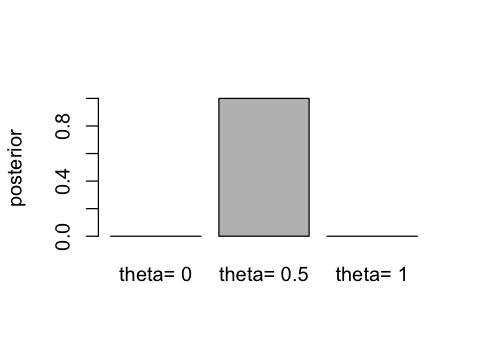

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
barplot( height   = posterior,
         names.ar = paste("theta=",Theta),
         ylab     = "posterior")

Let us examin what is happning:
We first evalute the likelihood as a function of $\theta$ (note that this is note a probability distribution)

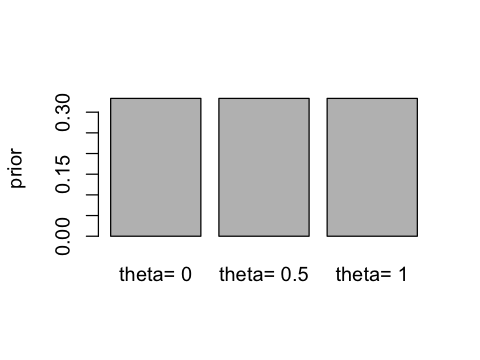

In [8]:
barplot( height   = P_Theta,
         names.ar = paste("theta=",Theta),
         ylab     = "prior")

Then we evalute the likelihood as a function of $\theta$ (note that this is note a probability distribution)

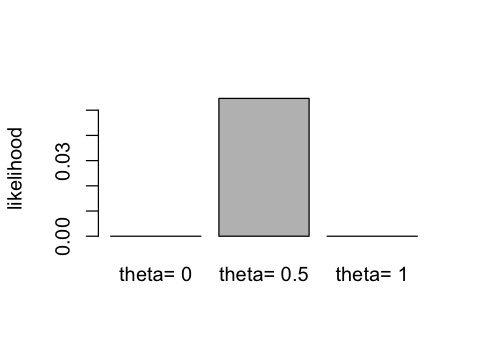

In [9]:

barplot( height   = likelihood,
         names.ar = paste("theta=",Theta),
         ylab     = "likelihood")

Suppose we belive that some more values than 0,0.5,1 are possible. 
We set the prior:
$$
\pi(\theta)  \propto 0.5 - |\theta-0.5|
$$
For  $\theta = 0,0.1,0.2,\ldots,1.$

In [10]:
Theta   <- seq(0,1, length = 11) 
P_Theta =  0.5 - abs(0.5 - Theta)  # unormalised prior
print(Theta)
print(P_Theta)
sum(P_Theta)

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.4 0.3 0.2 0.1 0.0


[1] 2.5

For the prior to be a proper probabilility distribution it needs to integrate to one:

In [11]:
print(P_Theta)
P_Theta = P_Theta/sum(P_Theta)
print(P_Theta)
sum(P_Theta)

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.4 0.3 0.2 0.1 0.0
 [1] 0.00 0.04 0.08 0.12 0.16 0.20 0.16 0.12 0.08 0.04 0.00


[1] 1

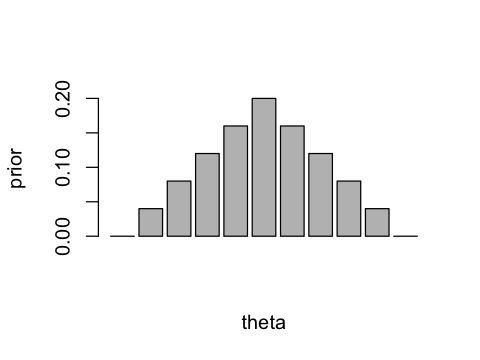

In [12]:
barplot( height   = P_Theta,
         xlab     = "theta",
         ylab     = "prior")

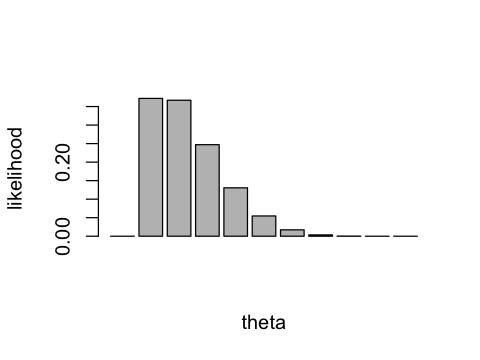

In [13]:
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
barplot( height   = likelihood,
         xlab     = "theta",
         ylab     = "likelihood")

[1] 1

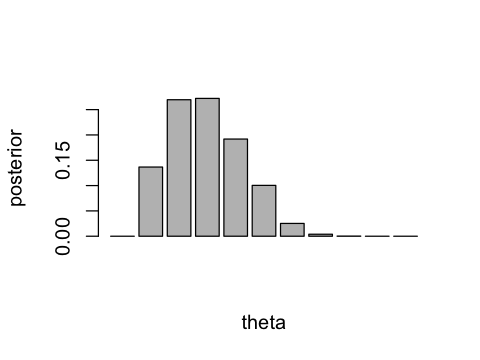

In [14]:
posterior <- (likelihood * P_Theta)  / sum(likelihood * P_Theta)
sum(posterior)
barplot( height   = posterior,
         xlab     = "theta",
         ylab     = "posterior")

Suppose now that we observe an new sequence of coin toesses from the same coin.


In [15]:
coin_toss_2 <- c(0,1,0,1,1,1,1,1,1)
Y_2         <- sum(coin_toss_2)
n_2         <- length(coin_toss_2)

Now we can use our previous posterior as prior

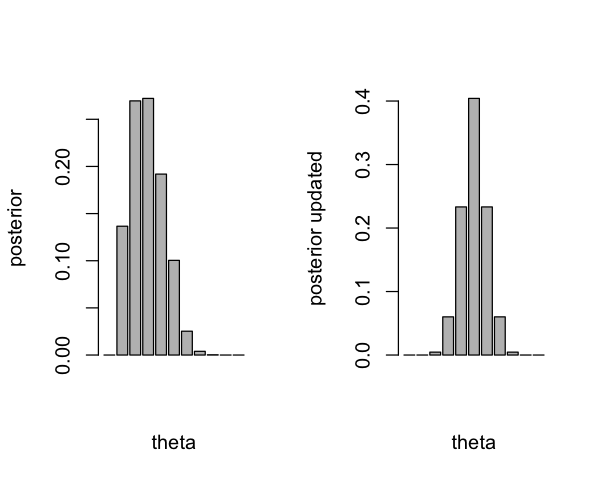

In [16]:
options(repr.plot.width=5, repr.plot.height=4)
prior       <- posterior
likelihood2 <-dbinom(x = Y_2, size = n_2, prob  =Theta) # one can put in Prob as a vector in dbinom
posterior_new <- likelihood2 * prior / sum(likelihood2 * prior)


par_ <- par(mfrow = c(1,2))
barplot( height   = posterior,
         xlab     = "theta",
         ylab     = "posterior")
barplot( height   = posterior_new,
         xlab     = "theta",
         ylab     = "posterior updated")
par(par_)

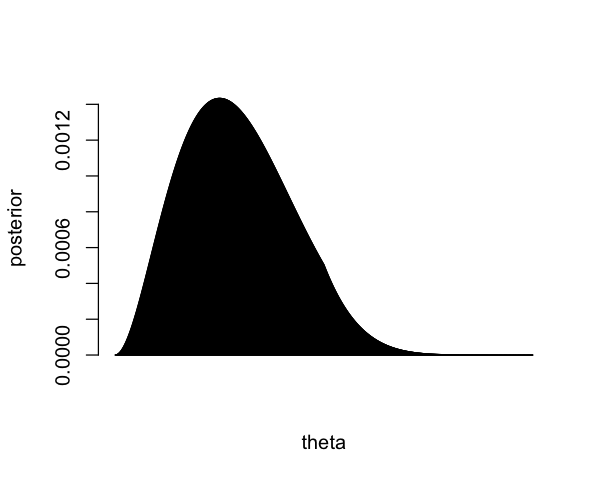

In [17]:
Theta   <- seq(0,1, length = 2000) 
P_Theta =  0.5 - abs(0.5 - Theta)  # unormalised prior
P_Theta = P_Theta/sum(P_Theta)
likelihood <- dbinom(x = Y, size = n, prob  =Theta) # one can put in Prob as a vector in dbinom
posterior <- likelihood * P_Theta / sum(likelihood * P_Theta)
barplot( height   = posterior,
         xlab     = "theta",
         ylab     = "posterior")
#print(Theta)

## Taking more and more increment we get closer and closer to a continous distribution

In [18]:
 Prior <- function(theta){ return(0.5 - abs(0.5 - theta)) }
Prior(0.5)

[1] 0.5

As with discrete distribution we ned it to sum to one ( integrate to one)
$$\int_0^1 \pi(\theta) d\theta= 1.$$

In [19]:
integrate(Prior, lower = 0 , upper = 1)
Prior_norm <- function(theta){ return(4*(0.5 - abs(0.5 - theta))) }

0.25 with absolute error < 2.8e-15

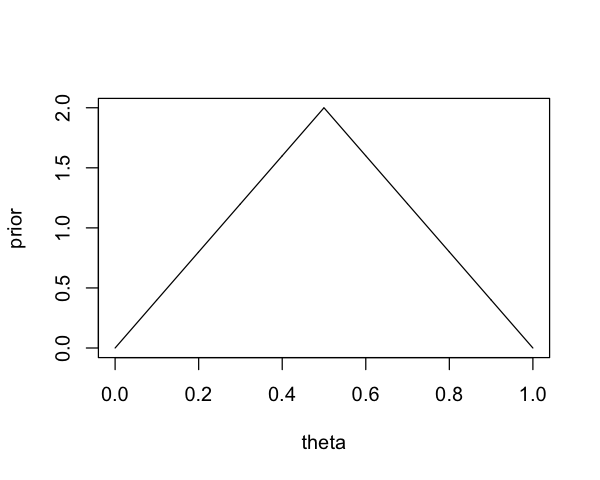

In [20]:
Theta   <- seq(0,1, length = 1000) 
plot(Theta, 
     Prior_norm(Theta), 
     xlab = "theta",
     ylab = "prior",
     type = 'l')

In [21]:
Posterior <- function(theta){dbinom(x = Y, size = n, prob  =theta) * Prior(theta)}
integrate(Posterior, lower = 0 , upper = 1)

0.02718099 with absolute error < 3e-16

In [22]:
Posterior_norm <- function(theta){dbinom(x = Y, size = n, prob  =theta) * Prior(theta)/0.1372768}

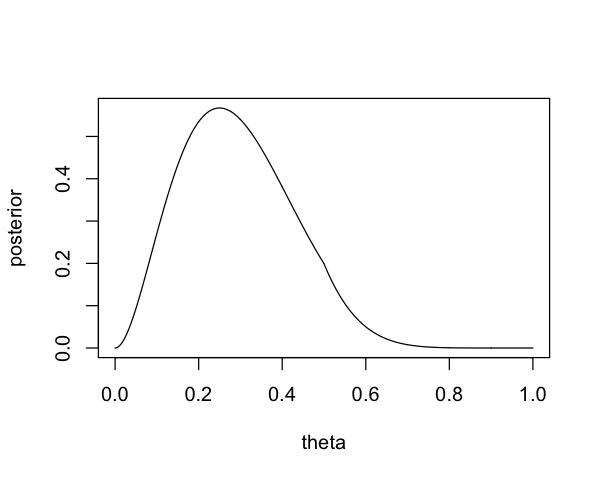

In [23]:
plot(Theta, 
     Posterior_norm(Theta), 
     xlab = "theta",
     ylab = "posterior",
     type = 'l')

Note to get the shape of posterior we don't need the normalising constant (the value so that the density integrates to one).

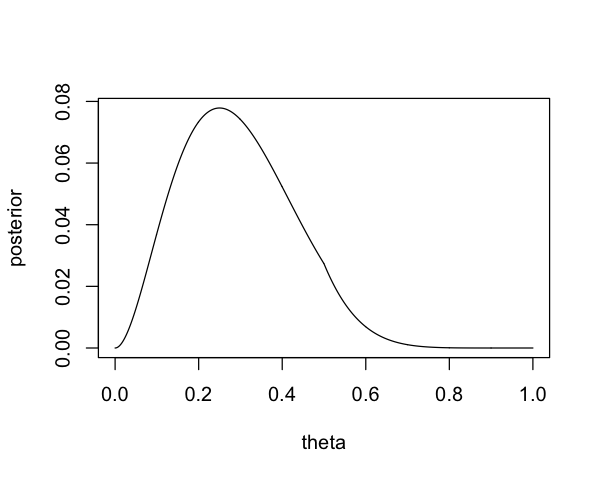

In [24]:
plot(Theta, 
     Posterior(Theta), 
     xlab = "theta",
     ylab = "posterior",
     type = 'l')